<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="scatterplot.JPG" style="width:600px;height:370px">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

<img src="equation.PNG" style="width:600px;height:370px" >

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="linear_equation.png" >

In [32]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('laptop.csv')
df

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,4403,ASUS,ASUS Zenbook UX430UN-GV022T Laptop (14 Inch | ...,84990,Intel Core i5 (8th Gen),Intel,32 GB Expandable,8,DDR4 RAM,1.6 Ghz Processor,LED,14,"Geforce MX150 GPU, 2 GB",NVIDIA,512 GB SSD Storage,No HDD,65,Upto 9 Hrs Battery Life
3972,4404,ASUS,ASUS Vivobook K15 OLED K513EA-L301WS Laptop (1...,40031,Intel Core i3 (11th Gen),Intel,Not Expandable,8,DDR4 RAM,4.0 Ghz Processor,LED,15.6,UHD,Intel,256 GB SSD Storage,No HDD,65,Upto 3 Hrs Battery Life
3973,4405,ASUS,ASUS VivoBook Pro 15 OLED M3500QC-L1711WS Lapt...,75990,AMD Octa-Core Ryzen 7,AMD,Not Expandable,16,DDR4 RAM,3.1 Ghz Processor,LED,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,1024 GB SSD Storage,No HDD,120,Upto 3 Hrs Battery Life
3974,4407,ASUS,ASUS TUF FX505DT-AL118T Laptop (15.6 Inch | AM...,71909,AMD Quad-Core Ryzen 5,AMD,32 GB Expandable,8,DDR4 RAM,2.1 Ghz Processor,LED,15.6,"GeForce GTX 1650 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,150,150W Adapter


In [34]:
dh=df.drop(columns=['Brand','Unnamed: 0','Name','Processor_Name','Processor_Brand','RAM_Expandable','SSD','GPU_Brand','RAM_TYPE','Ghz','Display_type','Display','GPU','HDD','Adapter','Battery_Life'])
dh

,Price,RAM
0,22990,4
1,36289,8
2,78500,16
3,55490,8
4,21990,8
...,...,...
3971,84990,8
3972,40031,8
3973,75990,16
3974,71909,8


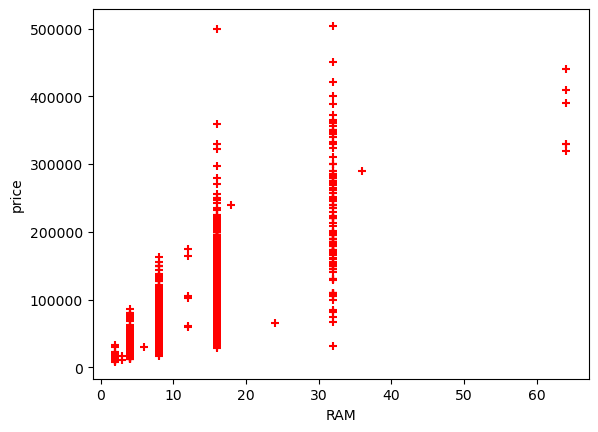

In [59]:
%matplotlib inline
plt.xlabel('RAM')
plt.ylabel('price')
plt.scatter(df.RAM,df.Price,color='red',marker='+')

In [36]:
new_df = dh.drop('Price',axis='columns')
new_df

,RAM
0,4
1,8
2,16
3,8
4,8
...,...
3971,8
3972,8
3973,16
3974,8


In [37]:
Price = dh.Price
Price

0       22990
1       36289
2       78500
3       55490
4       21990
        ...  
3971    84990
3972    40031
3973    75990
3974    71909
3975    69990
Name: Price, Length: 3976, dtype: int64

In [38]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,Price)

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [39]:
reg.predict([[3300]])

C:\Users\Dheya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20323047.0245833])

In [40]:
reg.coef_

array([6157.35499452])

In [41]:
reg.intercept_

3775.54267430694

**Y = m * X + b (m is coefficient and b is intercept)**

In [42]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [43]:
reg.predict([[5000]])

C:\Users\Dheya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30790550.5152637])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [55]:
ram_df = pd.read_csv("Ram.csv")
ram_df.head(3)

,RAM
0,16
1,32
2,8


In [56]:
p = reg.predict(ram_df)
p

array([102293.22258659, 200810.90249888,  53034.38263045,  28404.96265238,
        16090.25266334,  53034.38263045, 102293.22258659, 200810.90249888,
        53034.38263045,  28404.96265238,  16090.25266334, 200810.90249888,
        53034.38263045])

In [57]:
ram_df['prices']=p
ram_df

,RAM,prices
0,16,102293.222587
1,32,200810.902499
2,8,53034.382630
3,4,28404.962652
4,2,16090.252663
5,8,53034.382630
6,16,102293.222587
7,32,200810.902499
8,8,53034.382630
9,4,28404.962652


In [48]:
# area_df.to_csv("prediction.csv")


<h3>Exercise</h3>

<p >Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020</p>

<h3>Answer</h3>

41288.69409442